# Crime by Time of day Analysis (Q3)

In [51]:
#Import Dependencies 
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import numpy as np
import scipy.stats as stats
warnings.filterwarnings("ignore")

#read in file
csv_path = "Cleaned_Crime_Data.csv"
crime_data = pd.read_csv(csv_path)

In [52]:
#subset to only focus crimes 
crime_subset = crime_data[(crime_data["Crime Code Description"] == "CRIMINAL HOMICIDE") |(crime_data["Crime Code Description"] == "ARSON") |(crime_data["Crime Code Description"] == "KIDNAPPING")|(crime_data["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE") |(crime_data["Crime Code Description"] == "PICKPOCKET")]

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
14,983216,10/03/2015,1300,Central,185,PICKPOCKET,19.0,F,H,SIDEWALK,"(34.0383, -118.254)",10,3,2015,34.0383,-118.2540
58,995317,01/27/2015,1715,Central,158,KIDNAPPING,29.0,F,W,SIDEWALK,"(34.0395, -118.2405)",1,27,2015,34.0395,-118.2405
240,995524,05/31/2015,240,Central,164,PICKPOCKET,28.0,F,H,BAR/COCKTAIL/NIGHTCLUB,"(34.046, -118.2509)",5,31,2015,34.0460,-118.2509
255,995541,01/18/2015,1300,Central,181,PICKPOCKET,49.0,M,W,OTHER BUSINESS,"(34.0431, -118.2692)",1,18,2015,34.0431,-118.2692
405,995716,09/28/2015,2230,Central,111,KIDNAPPING,23.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0591, -118.2412)",9,28,2015,34.0591,-118.2412


## Crimes by hour of the day

In [53]:
#create bins to seperate 24-hour numerical data into groups based on hour
bins = [0, 99, 199, 299, 399, 499, 599, 699, 799, 899,999,1099,1199,1299,1399,1499,1599,1699,1799,1899,1999,
       2099,2199,2299,2399]

# Create labels for these bins
group_labels = ["12AM", "1AM", "2AM", "3AM", "4AM", "5AM",
                "6AM", "7AM", "8AM", "9AM","10AM","11AM","12PM",
                "1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]

#cut data into bins
crime_subset["Time of Day"] = pd.cut(crime_subset["Time Occurred"], bins, labels=group_labels)
crimes_times = crime_subset["Time of Day"].value_counts()
crimes_times.sort_index(inplace = True)

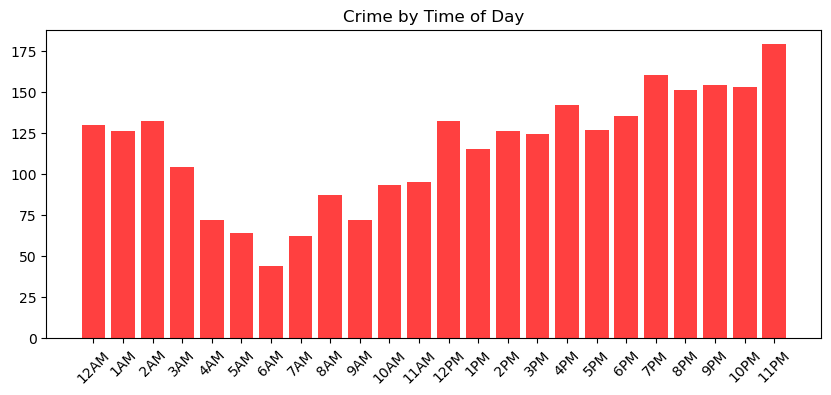

In [55]:
#Plot
plt.figure(figsize=(10,4))
x_axis = range(0,24)
plt.bar(x_axis,crimes_times,color = "red", alpha = .75)
plt.xticks(ticks=x_axis,labels=group_labels, rotation = 45)
plt.title("Crime by Time of Day")
plt.show()

As one can see, the amount of crimes happening varies based on the time of day. Once can observe a moderate amount of crime in the early hours of 12AM-3AM, a sharp dip in the morning hours (when more people are awake and around), and then a steady increase through the afternoon. Most crime happens around 11pm.

## Crime by time category

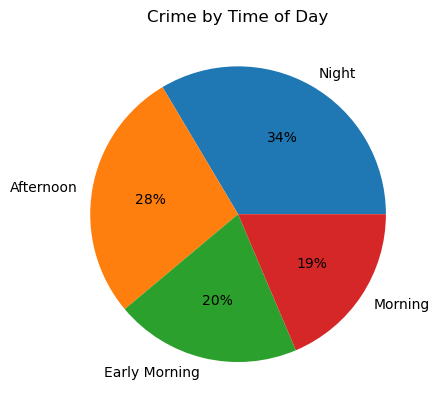

In [15]:
#create bins to seperate into bigger groups 
bins = [0,499,1199,1799,2399]

#create labels for bins and cut data
group_labels = ["Early Morning","Morning","Afternoon","Night"]
crime_subset["Time Category"] = pd.cut(crime_subset["Time Occurred"], bins, labels=group_labels)

#plot
times = crime_subset["Time Category"].value_counts().plot(kind="pie", ylabel = ' ', title = "Crime by Time of Day",autopct='%1.0f%%')

This more clearly shows that most crime happens in the night and afternoon

## Crime by Time Category and Type of Crime

Text(0, 0.5, '')

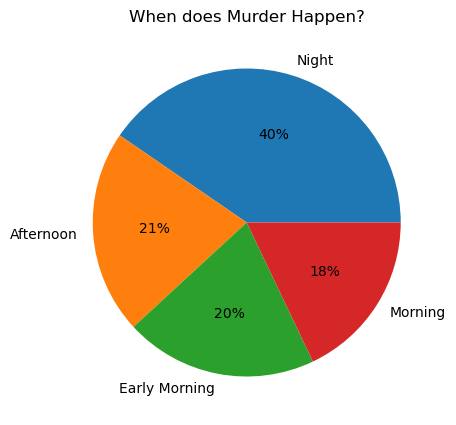

In [37]:
#Murder Plot
murder = crime_subset[crime_subset["Crime Code Description"] == "CRIMINAL HOMICIDE"]
murder_areas = murder["Time Category"].value_counts()
murderplot = murder_areas.plot.pie(figsize = (5,5),title = "When does Murder Happen?",ylabel = " ",autopct='%1.0f%%')
murderplot.axes.set_ylabel('')
plt.show()

Text(0, 0.5, '')

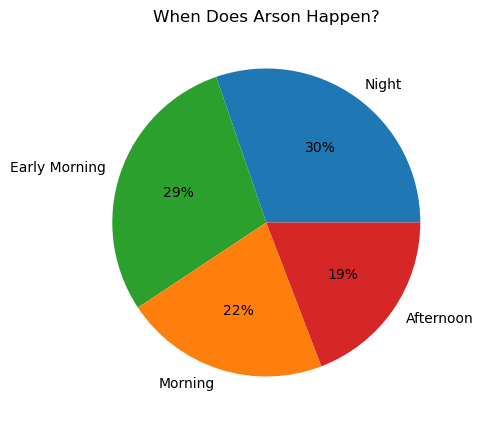

In [41]:
#Arson Plot
arson = crime_subset[crime_subset["Crime Code Description"] == "ARSON"]
arson_areas = arson["Time Category"].value_counts()
arsonplot = arson_areas.plot.pie(figsize = (5,5),title = "When Does Arson Happen?", colors = ["tab:blue","tab:green","tab:orange","tab:red"],autopct='%1.0f%%')
arsonplot.axes.set_ylabel('')
plt.show()

Text(0, 0.5, '')

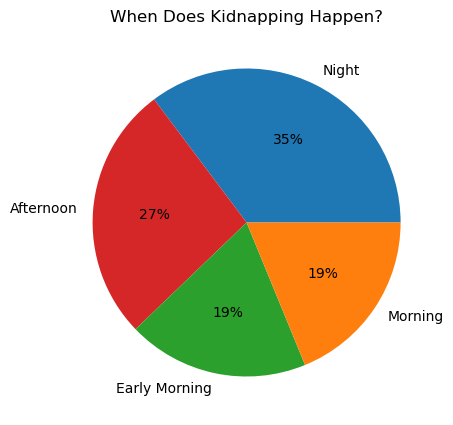

In [43]:
#Kidnapping Plot
kidnap = crime_subset[crime_subset["Crime Code Description"] == "KIDNAPPING"]
kidnap_areas = kidnap["Time Category"].value_counts()
kidplot = kidnap_areas.plot.pie(figsize = (5,5), title = "When Does Kidnapping Happen?",autopct='%1.0f%%',colors = ["tab:blue","tab:red","tab:green","tab:orange"])
kidplot.axes.set_ylabel('')
plt.show()

Text(0, 0.5, '')

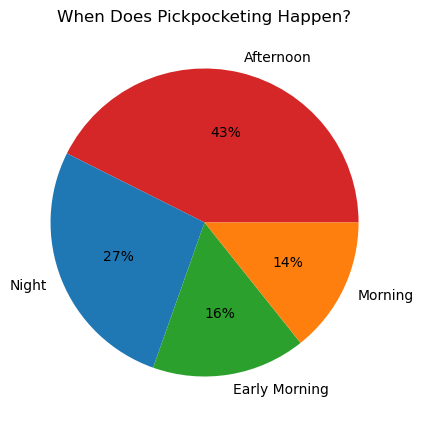

In [47]:
#Pickpocketing Plot
pick = crime_subset[crime_subset["Crime Code Description"] == "PICKPOCKET"]
pick_areas = pick["Time Category"].value_counts()
pickplot = pick_areas.plot.pie(figsize = (5,5), title = "When Does Pickpocketing Happen?",autopct='%1.0f%%',
                              colors = ["tab:red","tab:blue","tab:green","tab:orange"])
pickplot.axes.set_ylabel('')
plt.show()

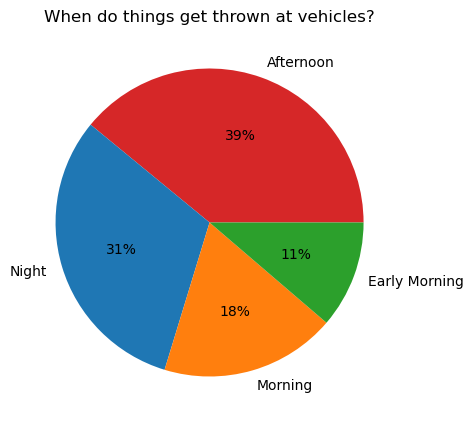

In [50]:
#Throwing things plot
throwing = crime_subset[crime_subset["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE"]
throwing_areas = throwing["Time Category"].value_counts()
throwplot = throwing_areas.plot.pie(figsize = (5,5),title = "When do things get thrown at vehicles?",autopct='%1.0f%%',
                                   colors=["tab:red","tab:blue","tab:orange","tab:green"])
throwplot.axes.set_ylabel('')
plt.show()

By looking at the individual pie charts, we can see a more nuanced look at when crime is happening. For example, while most murder and kidnapping happens at night, crimes like pickpocketing and throwing objects at vehicles are more common in the afternoon. 